## Importing our libraries

In [1]:
from functions import *

In [2]:
import pandas as pd
import numpy as np
import requests

### Importing Visualizations 


In [3]:
#For visalizations 

import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

cf.go_offline()

%matplotlib inline

## Uploading the data

In [4]:
crops=load_data('crops.csv')
crops.head()

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,OBJECTID
0,Horticulture,Cabbages,Ext Bag,126,KES2205.00,01/01/2012 12:00:00 AM,0
1,Horticulture,Cooking Bananas,Med Bunch,22,KES511.00,01/01/2012 12:00:00 AM,1
2,Horticulture,Ripe Bananas,Med Bunch,14,KES616.00,01/01/2012 12:00:00 AM,2
3,Horticulture,Carrots,Ext Bag,138,KES2833.00,01/01/2012 12:00:00 AM,3
4,Horticulture,Tomatoes,Lg Box,64,KES3411.00,01/01/2012 12:00:00 AM,4


In [5]:
#Upload data set 2 for main food crops per counties 

In [6]:
counties = load_data('counties.csv')
counties.head()

,_id,County,CROP,Area (HA),Production (Tons),Yield ( Tons/HA)
0,1,BARINGO,Beans,15669,11034,0.7
1,2,BOMET,Beans,39002,50140.76,1.3
2,3,BUNGOMA,Beans,77367,61051.12,0.8
3,4,BUSIA,Beans,27351,36422,1.3
4,5,ELGEYO MARAKWET,Beans,14873,16354.62,1.1


In [7]:
# prices dataset
prices = pd.read_excel('prices.xlsx')
prices.drop(columns =['Unnamed: 0','Minimum.' ], inplace = True )
prices.head()

,COMMODITY,Unit,Kg,Nairobi,Mombasa,Kisumu,Nakuru,Eldoret,Malindi,Kitale,Kisii,Kitui,Busia,Loitoktok,Garissa,Karatina,Embu,Average,Maximum.
0,Dry Maize,Bag,90.0,2995.000000,3100.000000,3200.000000,2380.000000,2600.0,3240.0,2261.111111,3200.0,3400.0,2373.75,3200.0,3600.0,2800.0,3000.0,2953.561508,3600.0
1,Green Maize,Ext Bag,115.0,3199.583333,5155.416667,1990.000000,1941.666667,1725.0,3000.0,1200.000000,3500.0,2000.0,1500.00,3250.0,6100.0,1000.0,2000.0,2682.976190,6100.0
2,Finger Millet,Bag,90.0,5530.000000,6525.000000,7200.000000,5311.250000,7200.0,5602.5,4500.000000,7300.0,7800.0,4725.00,NaN,7200.0,6000.0,5200.0,6161.057692,7800.0
3,Sorghum,Bag,90.0,3470.000000,3366.666667,3416.666667,3100.000000,3200.0,4357.5,1830.000000,NaN,4500.0,2475.00,NaN,6500.0,3000.0,4800.0,3667.986111,6500.0
4,Wheat,Bag,90.0,NaN,NaN,NaN,3515.000000,2800.0,4500.0,NaN,NaN,NaN,NaN,NaN,5500.0,3500.0,4000.0,3969.166667,5500.0


In [8]:
crops.head(5)

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date,OBJECTID
0,Horticulture,Cabbages,Ext Bag,126,KES2205.00,01/01/2012 12:00:00 AM,0
1,Horticulture,Cooking Bananas,Med Bunch,22,KES511.00,01/01/2012 12:00:00 AM,1
2,Horticulture,Ripe Bananas,Med Bunch,14,KES616.00,01/01/2012 12:00:00 AM,2
3,Horticulture,Carrots,Ext Bag,138,KES2833.00,01/01/2012 12:00:00 AM,3
4,Horticulture,Tomatoes,Lg Box,64,KES3411.00,01/01/2012 12:00:00 AM,4


## Getting information on our dataset

In [9]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Produce_Variety  1145 non-null   object
 1   Commodity_Type   1145 non-null   object
 2   Unit             1145 non-null   object
 3   Volume_in_Kgs    1145 non-null   int64 
 4   Values_in_Ksh    1143 non-null   object
 5   Date             1145 non-null   object
 6   OBJECTID         1145 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 62.7+ KB


## Functions

In [10]:
#We will define all our functions here to use
#def means(values):
#  the_mean = sum(values)/len(values)
#  return the_mean

#Function to take in columns with spaces bewteen and retutn striped
#def strip(val):
 # striped = val.str.strip()
 # return striped

#checking for null

#def nuls(val):
#  no_null = val.isnull().sum()
#  return no_null

# Check for duplicates 
#def duplicates(val):
#  no_duplicate=val.duplicated().sum()
#  return no_duplicate

## Data cleaning

### Validity 

In [11]:
counties.head()

,_id,County,CROP,Area (HA),Production (Tons),Yield ( Tons/HA)
0,1,BARINGO,Beans,15669,11034,0.7
1,2,BOMET,Beans,39002,50140.76,1.3
2,3,BUNGOMA,Beans,77367,61051.12,0.8
3,4,BUSIA,Beans,27351,36422,1.3
4,5,ELGEYO MARAKWET,Beans,14873,16354.62,1.1


In [12]:
# Ronald
#Drop illerevant columns, remove spaces at the beginign and end of  the columns

#Strip spaces within
strip((crops.Produce_Variety))
strip((crops.Commodity_Type))
#strip counties dataset
strip((counties.County))
strip((counties.CROP))
#Replace KES with empty 

crops['Values_in_Ksh'] = crops['Values_in_Ksh'].str.replace("KES","")

#Dataset 2 
counties['County']= counties['County'].str.strip()


### Accuracy 

In [13]:
#checking if related columns match

### Completeness 

In [14]:
# check for null values and either drop or fill
#fill null values in prices since we assume that all null means its not sold there 
prices.fillna(0, inplace=True)

In [15]:
prices.head()

,COMMODITY,Unit,Kg,Nairobi,Mombasa,Kisumu,Nakuru,Eldoret,Malindi,Kitale,Kisii,Kitui,Busia,Loitoktok,Garissa,Karatina,Embu,Average,Maximum.
0,Dry Maize,Bag,90.0,2995.000000,3100.000000,3200.000000,2380.000000,2600.0,3240.0,2261.111111,3200.0,3400.0,2373.75,3200.0,3600.0,2800.0,3000.0,2953.561508,3600.0
1,Green Maize,Ext Bag,115.0,3199.583333,5155.416667,1990.000000,1941.666667,1725.0,3000.0,1200.000000,3500.0,2000.0,1500.00,3250.0,6100.0,1000.0,2000.0,2682.976190,6100.0
2,Finger Millet,Bag,90.0,5530.000000,6525.000000,7200.000000,5311.250000,7200.0,5602.5,4500.000000,7300.0,7800.0,4725.00,0.0,7200.0,6000.0,5200.0,6161.057692,7800.0
3,Sorghum,Bag,90.0,3470.000000,3366.666667,3416.666667,3100.000000,3200.0,4357.5,1830.000000,0.0,4500.0,2475.00,0.0,6500.0,3000.0,4800.0,3667.986111,6500.0
4,Wheat,Bag,90.0,0.000000,0.000000,0.000000,3515.000000,2800.0,4500.0,0.000000,0.0,0.0,0.00,0.0,5500.0,3500.0,4000.0,3969.166667,5500.0


#### checking for null values

In [16]:
#checking nulls on crops dataset
#crops.isnull().sum()
nuls(crops)

Produce_Variety    0
Commodity_Type     0
Unit               0
Volume_in_Kgs      0
Values_in_Ksh      2
Date               0
OBJECTID           0
dtype: int64

In [17]:
#chuck nuls in prices 
nuls(prices)

COMMODITY    0
Unit         0
Kg           0
Nairobi      0
Mombasa      0
Kisumu       0
Nakuru       0
Eldoret      0
Malindi      0
Kitale       0
Kisii        0
Kitui        0
Busia        0
Loitoktok    0
Garissa      0
Karatina     0
Embu         0
Average      0
Maximum.     0
dtype: int64

In [18]:
#checking nulls on counties dataset
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   COMMODITY  42 non-null     object 
 1   Unit       42 non-null     object 
 2   Kg         42 non-null     float64
 3   Nairobi    42 non-null     float64
 4   Mombasa    42 non-null     float64
 5   Kisumu     42 non-null     float64
 6   Nakuru     42 non-null     float64
 7   Eldoret    42 non-null     float64
 8   Malindi    42 non-null     float64
 9   Kitale     42 non-null     float64
 10  Kisii      42 non-null     float64
 11  Kitui      42 non-null     float64
 12  Busia      42 non-null     float64
 13  Loitoktok  42 non-null     float64
 14  Garissa    42 non-null     float64
 15  Karatina   42 non-null     float64
 16  Embu       42 non-null     float64
 17  Average    42 non-null     float64
 18  Maximum.   42 non-null     float64
dtypes: float64(17), object(2)
memory usage: 6.4+ KB


###Consistency 

In [19]:
#dealing with duplicates 
#checking for duplicates in crops
duplicates(crops)


#No duplicates in the two datasets 


0

In [20]:
duplicates(prices)

0

In [21]:
#checking for duplicates in counties
duplicates(counties)

0

### Uniformity 

#### Columns

In [22]:
# Standaridization to fix messy columns to rename 
# example; officials_data.columns = officials_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')','') 
# data type conversions like to pd.to_datetime 
counties.columns = counties.columns.str.strip().str.replace('(','').str.replace(')',"").str.replace(')',"").str.replace('/',"_per_").str.replace(' ',"_") 

In [23]:
#Drop columns 
crops.drop(['OBJECTID'], axis = 1, inplace=True)

#### Data type conversion

In [24]:
# 

In [25]:
#removing KES from Values in Ksh column
crops["Values_in_Ksh"]=crops["Values_in_Ksh"].str.replace("KES","")

In [26]:
crops.head(5)

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date
0,Horticulture,Cabbages,Ext Bag,126,2205.00,01/01/2012 12:00:00 AM
1,Horticulture,Cooking Bananas,Med Bunch,22,511.00,01/01/2012 12:00:00 AM
2,Horticulture,Ripe Bananas,Med Bunch,14,616.00,01/01/2012 12:00:00 AM
3,Horticulture,Carrots,Ext Bag,138,2833.00,01/01/2012 12:00:00 AM
4,Horticulture,Tomatoes,Lg Box,64,3411.00,01/01/2012 12:00:00 AM


In [27]:
#convert crops value in ksh to integer
crops["Values_in_Ksh"]=crops["Values_in_Ksh"].astype(float)

In [28]:
crops.head(5)

,Produce_Variety,Commodity_Type,Unit,Volume_in_Kgs,Values_in_Ksh,Date
0,Horticulture,Cabbages,Ext Bag,126,2205.0,01/01/2012 12:00:00 AM
1,Horticulture,Cooking Bananas,Med Bunch,22,511.0,01/01/2012 12:00:00 AM
2,Horticulture,Ripe Bananas,Med Bunch,14,616.0,01/01/2012 12:00:00 AM
3,Horticulture,Carrots,Ext Bag,138,2833.0,01/01/2012 12:00:00 AM
4,Horticulture,Tomatoes,Lg Box,64,3411.0,01/01/2012 12:00:00 AM


In [29]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Produce_Variety  1145 non-null   object 
 1   Commodity_Type   1145 non-null   object 
 2   Unit             1145 non-null   object 
 3   Volume_in_Kgs    1145 non-null   int64  
 4   Values_in_Ksh    1143 non-null   float64
 5   Date             1145 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 53.8+ KB


In [30]:
#changing date
crops['Date'] =  pd.to_datetime(crops['Date'])

In [31]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1145 entries, 0 to 1144
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Produce_Variety  1145 non-null   object        
 1   Commodity_Type   1145 non-null   object        
 2   Unit             1145 non-null   object        
 3   Volume_in_Kgs    1145 non-null   int64         
 4   Values_in_Ksh    1143 non-null   float64       
 5   Date             1145 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 53.8+ KB


### Filling N/A Values with Average

In [32]:
crops['Values_in_Ksh'].fillna(0)

0        2205.0
1         511.0
2         616.0
3        2833.0
4        3411.0
         ...   
1140    12986.0
1141     2805.0
1142     2885.0
1143     2097.0
1144     3067.0
Name: Values_in_Ksh, Length: 1145, dtype: float64

In [33]:
crops.isnull().sum()

Produce_Variety    0
Commodity_Type     0
Unit               0
Volume_in_Kgs      0
Values_in_Ksh      2
Date               0
dtype: int64

In [34]:
crops['Values_in_Ksh'].ffill(0)

0        2205.0
1         511.0
2         616.0
3        2833.0
4        3411.0
         ...   
1140    12986.0
1141     2805.0
1142     2885.0
1143     2097.0
1144     3067.0
Name: Values_in_Ksh, Length: 1145, dtype: float64

In [35]:
crops['Values_in_Ksh'] = crops['Values_in_Ksh'].ffill(0)

In [36]:
crops.isnull().sum()

Produce_Variety    0
Commodity_Type     0
Unit               0
Volume_in_Kgs      0
Values_in_Ksh      0
Date               0
dtype: int64

In [37]:
counties

,_id,County,CROP,Area__HA,Production__Tons,Yield__Tons_per_HA
0,1,BARINGO,Beans,15669,11034,0.7
1,2,BOMET,Beans,39002,50140.76,1.3
2,3,BUNGOMA,Beans,77367,61051.12,0.8
3,4,BUSIA,Beans,27351,36422,1.3
4,5,ELGEYO MARAKWET,Beans,14873,16354.62,1.1
...,...,...,...,...,...,...
154,155,TAITA TAVETA,Rice,380,1320,3.5
155,156,TANA RIVER,Rice,1210,3855,3.2
156,157,THARAKA NITHI,Rice,28,79,2.8
157,158,WEST POKOT,Rice,20,72,3.6


In [38]:
counties.info

<bound method DataFrame.info of      _id           County   CROP Area__HA Production__Tons  Yield__Tons_per_HA
0      1          BARINGO  Beans    15669            11034                 0.7
1      2            BOMET  Beans    39002         50140.76                 1.3
2      3          BUNGOMA  Beans    77367         61051.12                 0.8
3      4            BUSIA  Beans    27351            36422                 1.3
4      5  ELGEYO MARAKWET  Beans    14873         16354.62                 1.1
..   ...              ...    ...      ...              ...                 ...
154  155     TAITA TAVETA   Rice      380             1320                 3.5
155  156       TANA RIVER   Rice     1210             3855                 3.2
156  157    THARAKA NITHI   Rice       28               79                 2.8
157  158       WEST POKOT   Rice       20               72                 3.6
158  159           VIHIGA   Rice        4               18                 4.5

[159 rows x 6 colum

#**Analysis Questions**

## 1. What are the average market prices of various products?

In [39]:
counties['CROP'].nunique


<bound method IndexOpsMixin.nunique of 0      Beans
1      Beans
2      Beans
3      Beans
4      Beans
       ...  
154     Rice
155     Rice
156     Rice
157     Rice
158     Rice
Name: CROP, Length: 159, dtype: object>

In [40]:
uniquecrops = counties.groupby('CROP')
counties

,_id,County,CROP,Area__HA,Production__Tons,Yield__Tons_per_HA
0,1,BARINGO,Beans,15669,11034,0.7
1,2,BOMET,Beans,39002,50140.76,1.3
2,3,BUNGOMA,Beans,77367,61051.12,0.8
3,4,BUSIA,Beans,27351,36422,1.3
4,5,ELGEYO MARAKWET,Beans,14873,16354.62,1.1
...,...,...,...,...,...,...
154,155,TAITA TAVETA,Rice,380,1320,3.5
155,156,TANA RIVER,Rice,1210,3855,3.2
156,157,THARAKA NITHI,Rice,28,79,2.8
157,158,WEST POKOT,Rice,20,72,3.6


In [41]:
# Grouping each crop by value counts to give the total of each commodity

counties['CROP'].value_counts()

Beans             47
Sorghum           47
Irish Potatoes    30
Rice              21
Wheat             14
Name: CROP, dtype: int64

In [42]:
# Out

counties['CROP'] == "Beans"

0       True
1       True
2       True
3       True
4       True
       ...  
154    False
155    False
156    False
157    False
158    False
Name: CROP, Length: 159, dtype: bool

<AxesSubplot:xlabel='County'>

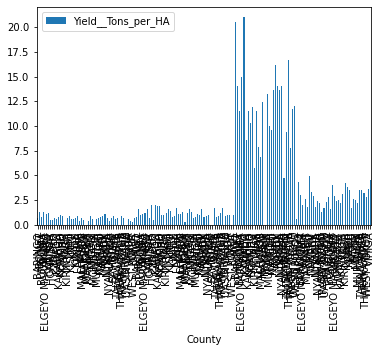

In [43]:
#using plotly here 

counties.plot(kind='bar', x='County', y='Yield__Tons_per_HA')

C:\Users\ronal\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:584: UserWarning:

The handle <BarContainer object of 5 artists> has a label of '_id' which cannot be automatically added to the legend.



<AxesSubplot:xlabel='CROP'>

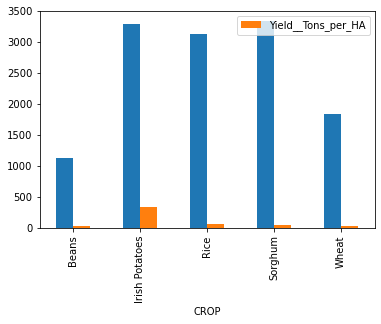

In [48]:
counties.groupby('CROP').sum().plot(kind='bar')

In [49]:
# This output is the average value in Ksh per Commodity Type
crops.groupby('Commodity_Type').mean()['Values_in_Ksh']

Commodity_Type
Avocado                  2158.064516
Beans Canadian           6133.791667
Beans Mwitemania         5628.666667
Beans Rosecoco           6134.708333
Brinjals                 1637.935484
Cabbages                 2121.967742
Capsicums                2612.838710
Carrots                  3565.000000
Cassava Fresh            1973.041667
Cauliflower              2528.451613
Chillies                 2679.838710
Cooking Bananas           553.806452
Cowpeas                  6094.166667
Cucumber                 2072.870968
Dolichos (Njahi)         8741.291667
Dry Maize                2782.875000
Finger Millet            6416.041667
Fresh Peas               2928.083333
Green Gram               8951.625000
Green Maize              2907.000000
Groundnuts              11244.416667
Kales                    1227.774194
Lemons                   1978.322581
Lettuce                  3342.419355
Limes                     723.838710
Mangoes Local            2083.774194
Mangoes Ngowe          

In [ ]:
# This output is the average value in Ksh per Produce Variety

crops.groupby('Produce_Variety').mean()['Values_in_Ksh']

## 2. What are the best regions to plant various commodities?

In [ ]:
counties.head()

In [ ]:
#Get a dataframe for max values
maxmum = counties.groupby(['CROP'])['Yield__Tons_per_HA'].transform(max) == counties['Yield__Tons_per_HA']

In [ ]:
counties[maxmum]

## 3. Which is the best duration to sell a specific commodity?

In [ ]:
#Add months column to group by
crops['Month'] = crops['Date'].dt.month
crops.head()


In [ ]:
a=crops.groupby(['Commodity_Type'])['Values_in_Ksh'].transform(max) == crops['Values_in_Ksh']
b=crops[a].groupby(['Month','Commodity_Type']).max()
b.drop(columns=['Produce_Variety','Date'])

## 4. What is the best selling commodity in various counties?

In [ ]:

crops['value_per_kg']= (crops['Values_in_Ksh']/crops['Volume_in_Kgs']).round(2)
crops.head()

In [ ]:
counties.head()

In [ ]:
counties[maxmum]

In [ ]:
#Best selling commidity in various counties 
prices.head(20)

In [ ]:
#Most popular popular product across the country
prices.drop(columns = ['COMMODITY','Unit','Kg']).idxmax()

# This shows that column that contains most expensive commodity across many counties and thats Groundnuts